In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Age'].isnull().sum()

177

In [6]:
import seaborn as sns

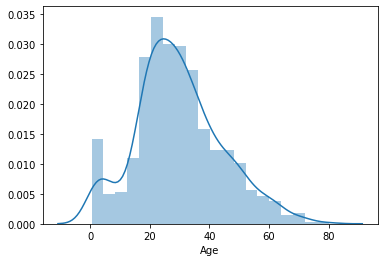

In [9]:
sns.distplot(df['Age'].dropna())

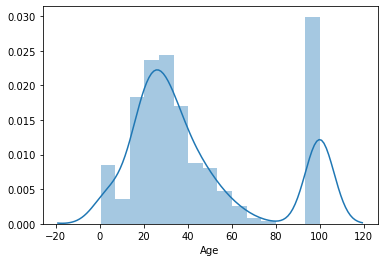

In [10]:
sns.distplot(df['Age'].fillna(100))

# ----Gaussian Distribution------- --> We will be using 3 standard deviation


Text(0, 0.5, 'No of Passenger')

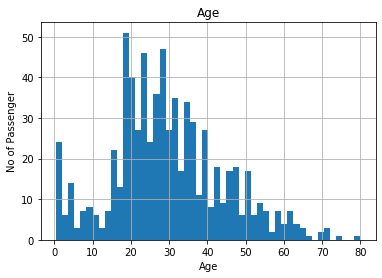

In [13]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

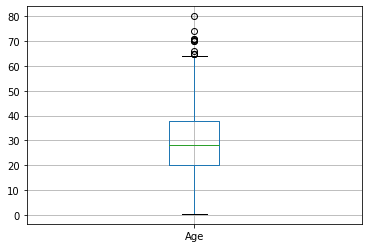

In [14]:
figure=df.boxplot(column='Age') # so above 

In [15]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# If data is normally distributed use below technique

In [17]:
#### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiate

upper_boundary=df['Age'].mean()+3*df['Age'].std()
lower_boundary=df['Age'].mean()-3*df['Age'].std()
print(lower_boundary),print(upper_boundary),print(df['Age'].mean())


-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

In [18]:
### Lets compute the Interquartile Range to calculate the boundaries

IQR = df.Age.quantile(0.75)-df.Age.quantile(0.25)

In [19]:
IQR

17.875

In [22]:
lower_bridge=df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge),print

-6.6875
64.8125


(None, None, <function print>)

In [23]:
#Extremes
lower_bridge=df['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Age'].quantile(0.75)+(IQR*3)
print(lower_bridge),print(upper_bridge)

-33.5
91.625


(None, None)

Text(0, 0.5, 'No of Passenger')

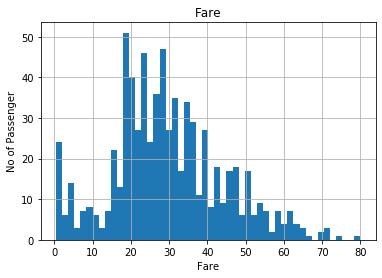

In [28]:
## Feature is Skewed ###

figure=df.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')

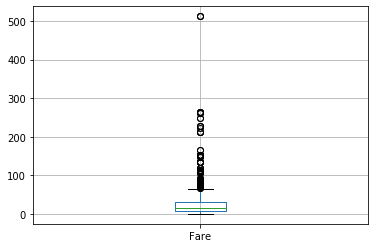

In [26]:
figure=df.boxplot(column='Fare')

In [33]:
df['Fare'].describe() #difference between 75% and max

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

# If the feature is skewed than follow the below technique

In [35]:
### Lets compute the Interquartile Range to calculate the boundaries


IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [36]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge),print

-26.724
65.6344


(None, None, <function print>)

In [37]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge),print(upper_bridge),print

-61.358399999999996
100.2688


(None, None, <function print>)

In [38]:
data=df.copy()

In [39]:
data.loc[data['Age']>=73,'Age']=73

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
data.loc[data['Fare']>=100,'Fare']=100

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No of Passenger')

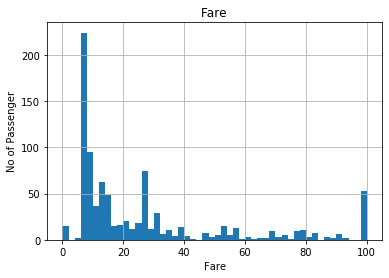

In [44]:
## Feature is Skewed ###

figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')

Text(0, 0.5, 'No of Passenger')

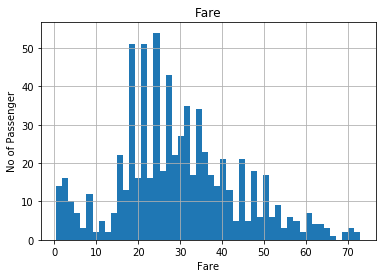

In [45]:
## Feature is Skewed ###

figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [59]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred_1 = classifier.predict_proba(x_test)

In [62]:
from sklearn.metrics import accuracy_score ,roc_auc_score
print("Accuracy_Score {}:".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score {}:".format(roc_auc_score(y_test,y_pred_1[:,1])))

Accuracy_Score 0.6604477611940298:
roc_auc_score 0.7282220943613349:


In [68]:
# Random Forest Regression

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred_1 = classifier.predict_proba(x_test)

In [69]:
from sklearn.metrics import accuracy_score ,roc_auc_score
print("Accuracy_Score {}:".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score {}:".format(roc_auc_score(y_test,y_pred_1[:,1])))

Accuracy_Score 0.6417910447761194:
roc_auc_score 0.6985327963176065:
